In [148]:
import nibabel as nib
import numpy as np
import os
from nilearn import plotting
from nilearn.image import index_img, mean_img
import itertools
import pandas as pd
import glob
%matplotlib inline

In [149]:
all_ac1s = glob.glob('./data/feat_files/sub-*/ses-*/run-*.feat/stats/threshac1.nii.gz')
all_ac1s[:10]

['./data/feat_files/sub-14/ses-se/run-3.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-14/ses-se/run-1.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-14/ses-se/run-2.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-14/ses-me/run-3.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-14/ses-me/run-1.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-14/ses-me/run-2.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-09/ses-se/run-3.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-09/ses-se/run-1.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-09/ses-se/run-2.feat/stats/threshac1.nii.gz',
 './data/feat_files/sub-09/ses-me/run-3.feat/stats/threshac1.nii.gz']

In [151]:
subs = np.arange(1, 19)
sessions = ['se', 'me']
runs = [1,2,3]

combs = itertools.product(subs, sessions, runs)

df = pd.DataFrame(combs, columns=['sub', 'ses', 'run'])
df['fn'] = df.apply(lambda x: './data/feat_files/sub-{}/ses-{}/run-{}.feat/stats/threshac1.nii.gz'.format(str(x[0]).zfill(2), x[1], x[2]), axis=1)
df['fn_exists'] = df['fn'].apply(os.path.exists)
df = df.loc[df['fn_exists']]
del df['fn_exists']

df['nii'] = df['fn'].apply(nib.load)

In [ ]:
def mean_params(niis):
#    print(niis.values)
    dat = np.mean(np.array([x.get_data() for x in niis.values]), axis=0)
    return nib.Nifti1Image(dat, niis.values[0].affine)

out = df.groupby(['sub', 'ses'])['nii'].apply(lambda x: mean_params(x))
#tmp = mean_params([nib.load(all_ac1s[x]) for x in [0,1,2]])

In [93]:
by_ses = out.reset_index().groupby('ses')['nii'].apply(mean_params)

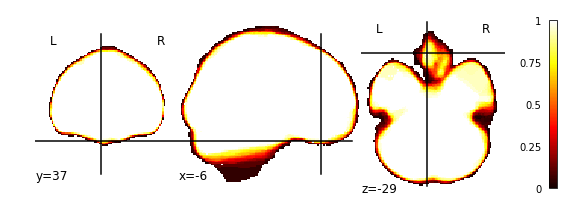

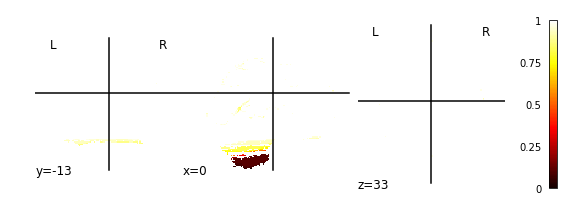

In [101]:
plotting.plot_stat_map(index_img(by_ses['me'], 0), bg_img=None, vmax=1)
plotting.plot_stat_map(index_img(by_ses['se'], 0), bg_img=None, vmax=1)

In [122]:
index_img(by_ses['me'], 0).get_data().mean()

26405574.0

In [124]:
index_img(by_ses['me'], 0)

array([[   1.60000002,    0.        ,    0.        ,  -96.        ],
       [   0.        ,    1.60000002,    0.        , -132.        ],
       [   0.        ,    0.        ,    1.60000002,  -78.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

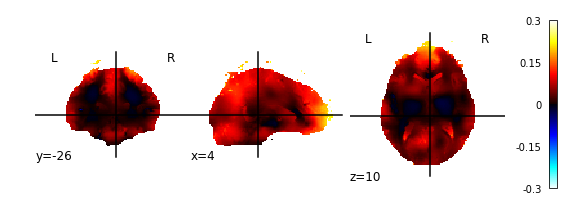

In [144]:
plotting.plot_stat_map(index_img(out.iloc[1], lag), bg_img=None, vmax=0.3, cut_coords=[4, -26, 10])

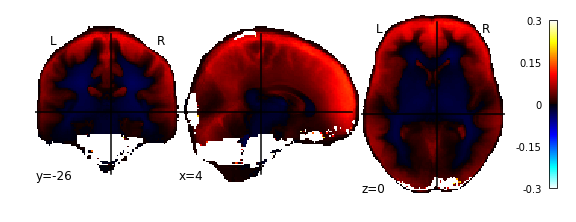

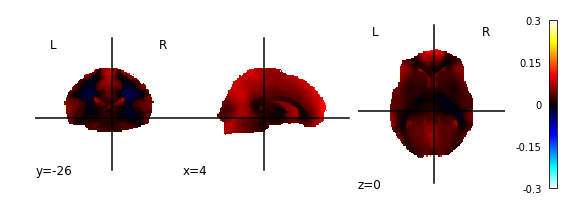

In [156]:
lag = 2
#plotting.plot_stat_map(index_img(by_ses['me'], lag), bg_img=None, vmax=0.3, cut_coords=[4, -26, 0])
plotting.plot_stat_map(index_img(by_ses['se'], lag), bg_img=None, vmax=0.3, cut_coords=[4, -26, 0])

In [169]:
nib.load('./data/deriv/fmriprep/sub-06/ses-me/func/sub-06_ses-me_task-stop_run-3_space-MNI152NLin2009cAsym_desc-preproc-hp-optcomb_bold.nii.gz').shape

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


(121, 144, 121, 206)

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


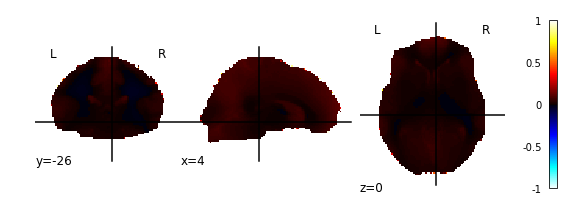

In [168]:
from nilearn.input_data import NiftiMasker

def mask_img(img, mask):
    masker = NiftiMasker(mask)

    data_masked = masker.fit_transform(img)
    data_masked_epispace = masker.inverse_transform(data_masked)
    return data_masked_epispace

se_autocors_masked = mask_img(by_ses['se'], 
                              mask='./data/deriv/fmriprep/sub-01/ses-se/func/sub-01_ses-se_task-stop_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')

plotting.plot_stat_map(index_img(se_autocors_masked, lag), bg_img=None, vmax=1, cut_coords=[4, -26, 0])

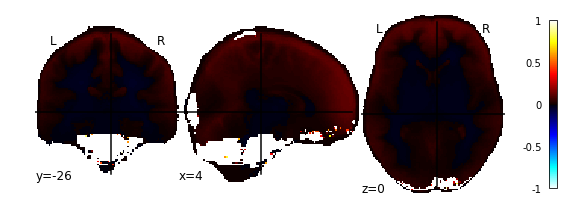

In [163]:
plotting.plot_stat_map(index_img(by_ses['me'], lag), bg_img=None, vmax=1, cut_coords=[4, -26, 0])

In [159]:
#nib.save(by_ses['me'], 'ses-me_autocor.nii.gz')
nib.save(by_ses['se'], 'ses-se_autocor.nii.gz')

In [77]:
tmp.shape

(121, 144, 121, 18)

In [70]:
dats = [nib.load(all_ac1s[x]).get_data() for x in [0,1,2]]

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


In [75]:
np.array(dats).mean(axis=0).shape

(121, 144, 121, 18)

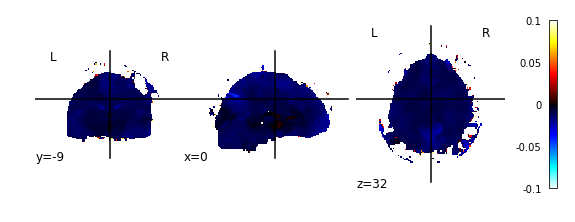

In [43]:
p1 = index_img(all_ac1s[0], 10)
plotting.plot_stat_map(p1, vmax=.1, bg_img=None)

In [5]:
plotting.plot_stat_map(all_ac1s[0])

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.